<a href="https://colab.research.google.com/github/NelsonSpencer/PeopleAnalytics/blob/master/Predicting_Manager_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Introduction

You are working for a North American sales company that has offices in six locations. Recently the CEO of this company has become interested in the performance of its managers. She is interested in knowing what measurable factors influence whether or not a manager performs well or performs poorly.

Dataset: https://github.com/keithmcnulty/ebp_exercise

In [0]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pickle
import io

!pip install eli5
!pip install mord

import eli5
import mord

  Created wheel for mord: filename=mord-0.6-cp36-none-any.whl size=6008 sha256=559fab42686d60409676bcd16cc50136a39003223348e320507c24bd03cadcb3
  Stored in directory: /root/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord


In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.pickle to data.pickle


In [0]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    # figure = plt.figure(figsize=(20, 10))
    # figure.add_subplot(1, len(columns), 1)
    # for index, col in enumerate(columns):
    #     if index > 0:
    #         figure.add_subplot(1, len(columns), index + 1)
    #     sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    # figure.tight_layout()
    # plt.show()
    
    # if len(df.select_dtypes(include='category').columns) > 0:
    #     for col_num in df.select_dtypes(include=np.number).columns:
    #         for col in df.select_dtypes(include='category').columns:
    #             fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
    #             fig.set_xticklabels(rotation=90)
    #             plt.show()
    
    # # Plot the pairwise joint distributions
    # print("\nTo check pairwise joint distribution of numeric data")
    # if hue==None:
    #     sns.pairplot(df.select_dtypes(include=np.number))
    # else:
    #     sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    # plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    # time_series_plot(df)

In [0]:
def summary_report(pipe):
    
    y_df = y_train.copy()
    X_df = X_train.copy()


    X_test1 = X_test.copy()
    y_test1 = y_test.copy()
    y_pred = pipe.predict(X_test1)

    
    #CV Accuracy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	  # evaluate model
    scores = cross_val_score(pipe, X_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Validation Accuracy (Training Data): {:0.3f}'.format(scores.mean()))


    print("Accuracy (Test Data): {:0.3f}".format(metrics.accuracy_score(y_test1, y_pred)))

    
    #Classification Report
    print("Classification Report (Test Data):")
    report = metrics.classification_report(y_test1, y_pred,
        target_names=class_names)
    print(report)
    


    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix (Test Data)", None)]


    np.set_printoptions(precision=10)
    
    for title, normalize in titles_options:
      disp = plot_confusion_matrix(pipe, X_test1, y_test1,
                                  display_labels=class_names,
                                  cmap=plt.cm.Greens,
                                  values_format = '')
      disp.ax_.set_title(title)

      print(title)
      return plt.show()


def summary_report_mord(pipe):
    
    y_df = y_train.copy()
    X_df = X_train.copy()


    X_test1 = X_test.copy()
    y_test1 = y_test.copy()
    y_pred = pipe.predict(X_test1)

    
    #CV Accuracy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	  # evaluate model
    scores = cross_val_score(pipe, X_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Validation Accuracy (Training Data): {:0.3f}'.format(scores.mean()))


    print("Accuracy (Test Data): {:0.3f}".format(metrics.accuracy_score(y_test1, y_pred)))

    
    #Classification Report
    print("Classification Report (Test Data):")
    report = metrics.classification_report(y_test1, y_pred,
        target_names=class_names,zero_division = 0)
    print(report)
    


    # Plot non-normalized confusion matrix


    cm = confusion_matrix(y_test1, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


    # # NOTE: Fill all variables here with default values of the plot_confusion_matrix
    disp = disp.plot(cmap=plt.cm.Greens,
                                  values_format = '')

    return plt.show()


In [0]:
#Load in data from pickle file https://github.com/keithmcnulty/ebp_exercise
raw_data = pickle.load(io.BytesIO(uploaded['data.pickle']))

raw_df = pd.DataFrame.from_dict(raw_data, orient='columns')

# Exploratory Data Analysis

Before we dig in, you always want to take a quick look at your data and see if there is anything that stands out that you'd like to change or make note of for later. A few examples of what this can include:


*   General description of the data
*   Missing Data
*   Understanding relationships and new insights through plots

From the Github Repo we can see the data includes the following fields for 571 managers:

*   employee_id: for each manager
*   performance_group of each manager: Bottom performer, Middle performer, Top performer
*   yrs_employed: Total length of time employed in years
*   manager_hire: whether or not the individual was hired directly to be a manager (Y) or promoted to manager (N)
*   test_score: score on a test given to all managers
*   group_size: the number of employees in the group they are responsible for
*   concern_flag: whether or not the individual has been the subject of a complaint by a member of their group
*   mobile_flag: whether or not the individual works mobile (Y) or in the office (N)
*   customers: the number of customer accounts the manager is responsible for
*   high_hours_flag: whether or not the manager has entered unusually high hours into their timesheet in the past year
*   transfers: the number of transfer requests coming from the manager's group while they have been a manager
*   reduced_schedule: whether the manager works part time (Y) or full time (N)
*   city: the current office of the manager.


In [0]:
eda(raw_df)

Preview of data:


,concern_flag,customers,employee_id,group_size,performance_group,test_score,manager_hire,reduced_schedule,mobile_flag,yrs_employed,transfers,high_hours_flag,city
0,N,12.0,c4578853,10.0,Bottom,205.0,N,Y,N,4.6,0.0,N,San Francisco
1,N,18.0,a7d7afd6,14.0,Middle,227.0,N,N,Y,5.3,0.0,N,New York
2,N,12.0,272b93f1,10.0,Bottom,227.0,N,Y,N,5.2,0.0,N,Chicago



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   concern_flag       571 non-null    object 
 1   customers          571 non-null    float64
 2   employee_id        571 non-null    object 
 3   group_size         571 non-null    float64
 4   performance_group  571 non-null    object 
 5   test_score         571 non-null    float64
 6   manager_hire       571 non-null    object 
 7   reduced_schedule   571 non-null    object 
 8   mobile_flag        571 non-null    object 
 9   yrs_employed       571 non-null    float64
 10  transfers          571 non-null    float64
 11  high_hours_flag    571 non-null    object 
 12  city               571 non-null    object 
dtypes: float64(5), object(8)
memory usage: 58.1+ KB
None

No duplicated entries found

To c

,count,mean,std,min,25%,50%,75%,max
customers,571.0,21.061296,4.876160,10.0,18.0,20.0,24.0,40.0
group_size,571.0,11.823117,2.947831,5.0,10.0,11.0,13.0,25.0
test_score,571.0,240.171629,80.042326,0.0,182.0,235.0,295.0,500.0
yrs_employed,571.0,4.595622,0.536197,2.0,4.3,4.6,5.0,6.0
transfers,571.0,0.796848,1.113265,0.0,0.0,0.0,2.0,5.0


From the script above we can glean some basic information about the dataset such as:

*   No missing values (yay)
*   A few categorical variables that will need to be handled later on to input into any model
*   The average manager has been employed for around ~4.5 years



Since we know the dependent variable is the performance group, we can additionally take a look of the distribution in the data set to see what it currently looks like.

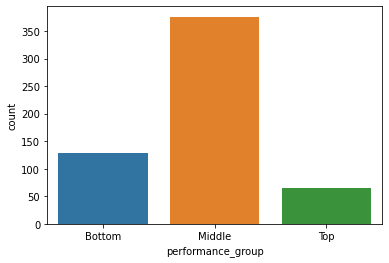

In [0]:
sns.countplot(x="performance_group", data=raw_df)

In [0]:
raw_df.groupby(['performance_group']).mean()

,customers,group_size,test_score,yrs_employed,transfers
performance_group,,,,,
Bottom,20.961240,11.364341,218.713178,4.751163,0.945736
Middle,20.984043,11.840426,242.023936,4.583777,0.787234
Top,21.696970,12.621212,271.560606,4.359091,0.560606


While we'd like to have a larger dataset, it's not unusual for a multiclass classification problem like this to have an imbalanced dataset. However, this can be an issue for our models later since they would be learning on skewed data. To get around this we'll use what's called stratification, which will make sure the different classes are represented later in the build section.  

Addiotnally we can also see a interesting bit of information that the top performing managers have less transfers than the bottom group in the dataset.

# Data Preprocessing

Before creating our different multi-class classification algorithms, we need to make sure the data is properly prepared. Typically this includes the following:



*   Handling Missing Data (Can skip this since there aren't any missing vals)
*   Dropping irrelevent columns
*   Encoding Categorical Variables (Feature Scaling will be in our pipeline preprocessor but it's only used on the training set after splitting the data)
*   Split the Data into Training and Test Set



### Dropping irrelevent columns


In [0]:
# Dropping irrelevant columns (employee_id)
df = raw_df.drop(['employee_id'],axis=1)

In [0]:
#Sklearn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB 

### Encoding Categorical Variables and Feature Scaling in Pipeline

In [0]:
# Seperate dependent and independent variables
y = df['performance_group']
X = df.drop(['performance_group'],axis=1)

class_names = df['performance_group'].unique().tolist()

#Use label Encoder for the features because there is an ordinal hierarchy in the data
le = LabelEncoder()
y = le.fit_transform(y)

#Create transformers and pipeline that will be used before model fit
# define transformers
ss = StandardScaler() #standardize the feature scaling for the numerical features
ohe = OneHotEncoder(drop='first') #avoid dummy variable trap on categorical data

#find numerical and categorical features 
categorical_features = X.select_dtypes(include = 'object').columns.tolist()
numeric_features = X.select_dtypes(include = 'float').columns.tolist()

#create the preprocessing pipelines for both numeric and categorical data. no simple imputer as there's no missing data
numeric_transformer = Pipeline(steps=[
                      ('scaler', ss)])
categorical_transformer = Pipeline(steps=[
                      ('onehot', ohe)])

# create columntransformer preprocessor to be used in future models
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],remainder = 'passthrough')

### Split the Data into Training and Test Set

In [0]:
# split data into train and test 70% in train. stratify to make representation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify = y, random_state = 1)

# Data Modeling

There are a lot of popular algorithms we can use for multiclass classification problems like this, here are the few we'll work through:
*   K-NN
*   Naive Bayes
*   Logistic Regression (Adjusted for MultiClass)
*   Support Vector Machine (SVM)
*   Neural Network
*   Random Forest
*   XGBoost

Since we're using Pipeline to preprocess the data, it should be easy to quickly generate new models and show the results. For each model, there will be a function to generate various evaluation metrics including accuracy for cross validation of the training data and accuracy of the test data, a classification report (which includes precision, recall, f1-score, and support), and finally a confusion matrix.


A quick primer on what these are and how to interpret them:
*   Accuracy
  * Simply the number of correct predictions from all predictions made. Accuracy can be misleading however. Sometimes it may be desirable to select a model with a lower accuracy because it has a greater predictive power on the problem. Additionally, in a problem where there is a large class imbalance (like this one), a model can predict the value of the majority class for all predictions and achieve a high classification accuracy, the problem is that this model is not useful for new data. Another issue is that it doesn't tell you the context such as false negative and positives like the confusion matrix does, which is tremendously importante when you're working with data that effects human lives such as a cancer diagnosis. 
*   Classification Report
    *   Precision
      *   Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”
    *   Recall
      * Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”
    *   F1 Score
      * The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
    *   Support
      *   The number of occurences of the given class in the dataset. As mentioned above, we're mostly working with an imbalanced dataset and have taken a few steps to adjust for this.
*   Confusion Matrix
  * Similar to a classification report, the confusion matrix is a table that shows you the performance of a classification model. It contains information about the actual and prediction classifications done by the classifier and this information is used to evaluate the performance of the classifier.


### K-NN

One of the most simple algorithms to conceptually understand. When an outcome is required for a new data instance, the KNN algorithm goes through the data set to find the k-nearest instances to the new instance, or the k number of instances most similar to the new record, and then outputs the mean of the outcomes (for a regression problem) or the mode (most frequent class) for a classification problem. The value of k is user-specified.

In [0]:
# Fit KNN Model after preprocessing 
# choose 29 as a loop of 1-100 which isn't a realistic option with a larger dataset
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors=29))])

_ = knn.fit(X_train,y_train) #supress output on screen

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.657
Accuracy (Test Data): 0.651
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.33      0.03      0.05        39
      Middle       0.66      0.98      0.79       113
         Top       0.00      0.00      0.00        20

    accuracy                           0.65       172
   macro avg       0.33      0.34      0.28       172
weighted avg       0.51      0.65      0.53       172

Confusion matrix (Test Data)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


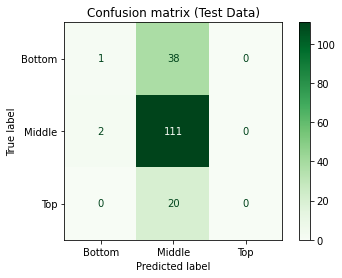

In [0]:
summary_report(knn)

### Naive Bayes

To calculate the probability that an event will occur, given that another event has already occurred, we use Bayes’s Theorem. To calculate the probability of hypothesis(h) being true, given our prior knowledge(d), we use Bayes’s Theorem. This algorithm is called ‘naive’ because it assumes that all the variables are independent of each other, which is a naive assumption to make in real-world examples.

In [0]:
# Fit Model after preprocessing 
NB = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])
_ = NB.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.400
Accuracy (Test Data): 0.570
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.28      0.23      0.25        39
      Middle       0.67      0.75      0.71       113
         Top       0.29      0.20      0.24        20

    accuracy                           0.57       172
   macro avg       0.41      0.39      0.40       172
weighted avg       0.54      0.57      0.55       172

Confusion matrix (Test Data)


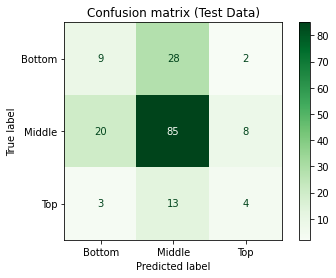

In [0]:
summary_report(NB)

### Logistic Regression

Similar to linear regression except that logistic regression predictions are discrete values for predicting categorical varialbles instead of a value (linear regression), after applying a transformation function. They focuses on estimating the probability of an event occurring based on the previous data provided.

In [0]:
# Fit Model after preprocessing 
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'))])

_ = lr.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.637
Accuracy (Test Data): 0.634
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.50      0.08      0.13        39
      Middle       0.66      0.93      0.77       113
         Top       0.17      0.05      0.08        20

    accuracy                           0.63       172
   macro avg       0.44      0.35      0.33       172
weighted avg       0.56      0.63      0.54       172

Confusion matrix (Test Data)


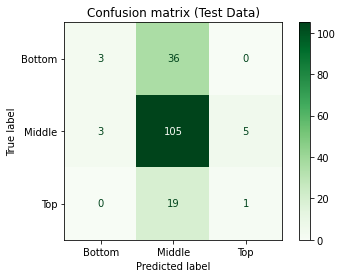

In [0]:
summary_report(lr)

### Mord (Ordinal Logistic Regression)

Ordinal Regression denotes a family of statistical learning methods in which the goal is to predict a variable which is discrete and ordered.

In [0]:
# Fit Model after preprocessing 
mo = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', mord.LogisticAT(alpha=1.))])

_ = mo.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.667
Accuracy (Test Data): 0.651
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.43      0.08      0.13        39
      Middle       0.66      0.96      0.78       113
         Top       0.00      0.00      0.00        20

    accuracy                           0.65       172
   macro avg       0.36      0.35      0.30       172
weighted avg       0.53      0.65      0.54       172



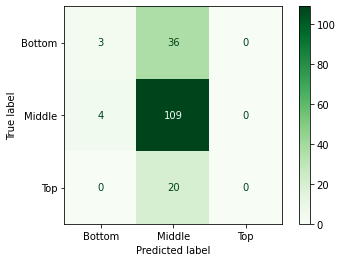

In [0]:
summary_report_mord(mo)

### Support Vector Machines (SVM)

Support Vector Machine algorithms essentially filter data into categories, which is achieved by providing a set of training examples, each set marked as belonging to one or the other of the other categories. The algorithm then works to build a model that assigns new values to one category or the other.

In [0]:
# Fit Model after preprocessing 
SVM = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC(decision_function_shape="ovo"))])

_ = SVM.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.664
Accuracy (Test Data): 0.657
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.50      0.08      0.13        39
      Middle       0.66      0.97      0.79       113
         Top       0.00      0.00      0.00        20

    accuracy                           0.66       172
   macro avg       0.39      0.35      0.31       172
weighted avg       0.55      0.66      0.55       172

Confusion matrix (Test Data)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


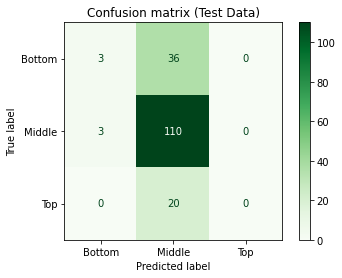

In [0]:
summary_report(SVM)

### Neural Network

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated. Typically used for clustering and classification.

In [0]:
# Fit Model after preprocessing 
nn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1))])

_ = nn.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.537
Accuracy (Test Data): 0.541
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.27      0.26      0.26        39
      Middle       0.70      0.71      0.70       113
         Top       0.15      0.15      0.15        20

    accuracy                           0.54       172
   macro avg       0.37      0.37      0.37       172
weighted avg       0.54      0.54      0.54       172

Confusion matrix (Test Data)


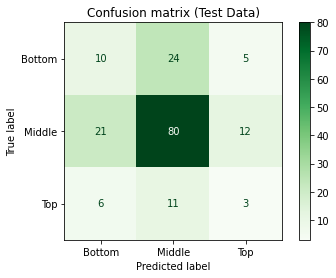

In [0]:
summary_report(nn)

### Random Forest

Random forests or ‘random decision forests’ is an ensemble learning method, combining multiple algorithms to generate better results for classification, regression and other tasks. Each individual classifier is weak, but when combined with others, can produce excellent results. The algorithm starts with a ‘decision tree’ (a tree-like graph or model of decisions) and an input is entered at the top. It then travels down the tree, with data being segmented into smaller and smaller sets, based on specific variables.

In [0]:
# Fit Model after preprocessing. Don't need to scale numeric data for RF
rf = RandomForestClassifier(n_estimators=9, criterion = 'entropy', random_state=0)

rf_pipe = Pipeline(steps=[('preprocessor', preprocessor_rf),
                      ('classifier',rf )])

_ = rf_pipe.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.617
Accuracy (Test Data): 0.570
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.31      0.28      0.30        39
      Middle       0.67      0.75      0.71       113
         Top       0.18      0.10      0.13        20

    accuracy                           0.57       172
   macro avg       0.39      0.38      0.38       172
weighted avg       0.54      0.57      0.55       172

Confusion matrix (Test Data)


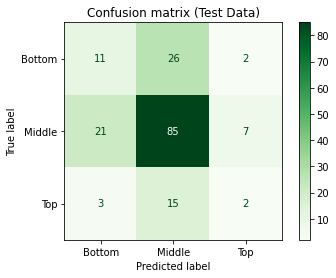

In [0]:
summary_report(rf_pipe)

### XGBoost

XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [0]:
# Fit Model after preprocessing 
XGB = Pipeline(steps=[('preprocessor', preprocessor_rf),
                      ('classifier', xgb.XGBClassifier(objective='multi:softmax'))])

_ = XGB.fit(X_train,y_train)

#### Accuracy, Classification Report, and Confusion Matrix

Cross Validation Accuracy (Training Data): 0.645
Accuracy (Test Data): 0.599
Classification Report (Test Data):
              precision    recall  f1-score   support

      Bottom       0.33      0.13      0.19        39
      Middle       0.65      0.85      0.74       113
         Top       0.20      0.10      0.13        20

    accuracy                           0.60       172
   macro avg       0.40      0.36      0.35       172
weighted avg       0.53      0.60      0.54       172

Confusion matrix (Test Data)


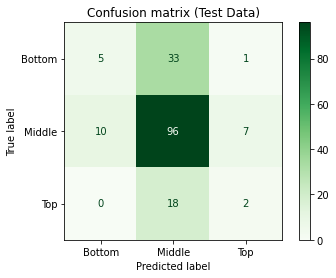

In [0]:
summary_report(XGB)

#Model Interpretation

At this point we've run through the various algorithms and have seen how they compare to one another. The next part of the process is to figure out which one to use to use for our presentation to our hypothetical manager who wants us to make a recommendation on how to proceed. 

Since this isn't for a Kaggle competition or a production level model, we're going to choose one which is interpreteible, not necessarily the one that performed the best. For this reason, we'll go with XGBoost as decision trees are useful when trying to identify the weights that had the largest impact on the model.

In [0]:
onehot_columns = list(XGB.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

In [0]:
# Show Top 10 Weights in the Model
eli5.show_weights(XGB.named_steps['classifier'], top=10,target_names = class_names, feature_names=numeric_features_list)

Weight,Feature
0.1106,mobile_flag_Y
0.0919,city_San Francisco
0.0910,test_score
0.0891,high_hours_flag_Y
0.0803,yrs_employed
0.0703,group_size
0.0695,transfers
0.0662,city_Orlando
0.0639,city_New York
0.0577,manager_hire_Y


While the weights are not very strong, this does give us something to work with. It's interesting to notice that the San Francisco Flag had one of the higher impacts related to the model. One thing we need to keep in mind here is that these weights that had an effect on the model, we can't specifically say (in this case) which attributes were associated with the top managers.

# Strategic Recommendations

Now that we have the bulk of the project done, the last and arguably most important part is being able to use the analysis to drive strategic recommendations. 

Here are three strategic recommendations I'd make based on the analysis:
*   I'd explore allowing more managers be able to work remotely. At the time of this writing, the majority of the world is doing so already due to the COVID-19 pandemic already, so it will likely continue to be more of a common trend in the workforce going forward. Never the less, it's interesting to see it as a high performing feature in this model. Even if organizations don't specifically allow more remote work, they certainly will need to have the systems and processes in place for a more distributed workforce.
*   As Test Score is a high weighted feature, I'd recommend looking into starting or increasing the Learning and Development resources for the company to allow for more training and learning opportunities for managers to improve their work skills. This would be not only for the specific test they are required to take, but also just to improve their leadership capabilities overall.
*   The final recommendation is to take a look at their current process to reduce the number of times managers are entering unusually high hours. While it probably isn't feasible, or necessarily even the best option, to hire more managers, it could be a good opportunity to dive into workforce data to see if there are any tweaks they can make to better optimize their time. Starting with something on a small scale such as a survey could lead to interesting insights an organization could take advantage of. 
*   While not an offical recommendation, it's interesting to see the San Francisco office appear as a high weighted feature in the model. I'd take a deeper look there to see if there are any interesting insights that could be found.

# Future Project Updates

*   Tune and Gridsearch to optimize models
*   Optimize Code


# References


*   Classification Report Definitions - https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
*   Confusion Matrix Definition - https://dev.to/overrideveloper/understanding-the-confusion-matrix-2dk8
*   Accuracy Definition - https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/
*   Algorithm Definitions 1 - https://www.dataquest.io/blog/top-10-machine-learning-algorithms-for-beginners/
* Algorithm Definitions 2 - https://www.sas.com/en_gb/insights/articles/analytics/machine-learning-algorithms.html
* Algorithm Definitions 3 -https://pathmind.com/wiki/neural-network
* Algorithm Definitions 4 - https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html
* Sklearn Documentation - https://scikit-learn.org/stable/index.html
* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 162). O'Reilly Media. Kindle Edition. 
*  An Easier Way to Encode Categorical Features -https://towardsdatascience.com/an-easier-way-to-encode-categorical-features-d840ff6b3900
* Using ColumnTransformer to combine data processing steps - https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
* One-Hot-Encoding, Multicollinearity and the Dummy Variable Trap - https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a
